1. Explore the dataset, list number of rows and columns, check sanity, examine
    features (e.g. histograms/plots).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

cc = pd.read_csv("creditcard.csv")

print(cc.head())
#[5 rows x 31 columns]

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
print(cc.columns.tolist())

#Examining the features
#understanding the data set
print(cc.info())
#There are no null values!
#dtypes: float64(30), int64(1)
#28 objects, 1 Time, 1 Amount, 1 Class

#Descriptive Statistics
print(cc.describe())

#More than one class for its label
print(cc["Class"].unique())
#yes two classes 0 and 1

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null

(array([3.23000e+02, 9.07800e+03, 7.10230e+04, 1.52686e+05, 5.04660e+04,
        1.19500e+03, 2.70000e+01, 8.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-4.49894468, -3.16127605, -1.82360742, -0.48593879,  0.85172983,
         2.18939846,  3.52706709,  4.86473572,  6.20240434,  7.54007297,
         8.8777416 ]),
 <BarContainer object of 10 artists>)

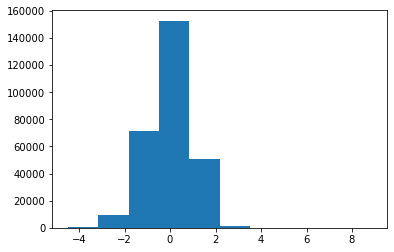

In [3]:
#plt.hist(cc['Class'])
#Mostly 0 class
#plt.hist(cc['Amount'])
#Anamolies seen > 55000, normal dist good
plt.hist(cc['V15'])
#All of the V's are normally distributed between -number , to +number

In [4]:
#2. 
# count values for class 0
print(cc['Class'].value_counts()[0])
 
# count values for class 1
print(cc['Class'].value_counts()[1])


284315
492


3.Check if you need normalization or standardization, and justify. Complete preprocessing.

Plotting the histogramns for each column on the V's & amount we realize that we need normalization since the distruibution of each of the features have different scales.

In [5]:
y = cc['Class']
X = cc.drop('Class', axis=1)

#4. Split the dataset 50-50 for training and testing. Then run SVC,
#DecisionTreeClassifier, MLPClassifier, RandomForest without any tree pruning or
#regularization. Report the classification performance. 

X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.5)

#3. preprocessing using Min Max Scaler for normalization of the features
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf_svc = SVC(kernel='linear')
clf_tree = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()
clf_nn = MLPClassifier()

clf_svc.fit(X_train, Y_train)
clf_tree.fit(X_train, Y_train)
clf_rf.fit(X_train, Y_train)
clf_nn.fit(X_train, Y_train)

svc_score = accuracy_score(y_test, clf_svc.predict(X_test))
print(f'SVC accuracy= {svc_score:.2f}\n')

dt_score = accuracy_score(y_test, clf_tree.predict(X_test))
print(f'Decision Tree accuracy= {dt_score:.2f}\n')

rf_score = accuracy_score(y_test, clf_rf.predict(X_test))
print(f'Random Forest accuracy= {rf_score:.2f}\n')

nn_score = accuracy_score(y_test, clf_nn.predict(X_test))
print(f'MLP accuracy= {dt_score:.2f}\n')

SVC accuracy= 1.00

Decision Tree accuracy= 1.00

Random Forest accuracy= 1.00

MLP accuracy= 1.00



In [6]:
#4. Then run SVC,
#DecisionTreeClassifier, MLPClassifier with tree pruning and regularization (Hint: might
#use GridSearchCV to optimize the regularization parameters; or simply run a few pilot tests).
#Report the classification performance.
#Applying hyper parameters to each model TWICE


#This takes a while to run be cautious
#Takes too long to process hyperparameterization
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid 
param_dist_svc = {"kernel": ("linear","poly","rbf"),
                    "C": (0.1, 1, 10, 100, 1000),
                     "gamma": (0.1, 1, 10, 100)}

param_dist_tree = {"max_depth": randint(3, 12),
                    "max_features": randint(3, 20)}
    
param_dist_rf = {"max_depth": randint(3, 12),
                  "max_features": randint(3, 20),
                  "n_estimators": randint(20,100)}
    
param_dist_nn = {"hidden_layer_sizes": randint(1,10),
                  "learning_rate":('constant','invscaling','adaptive')}
  
# creating the RandomizedSearchCV object
#svc_cv = RandomizedSearchCV(clf_svc, param_dist_svc, cv = 2)
#tree_cv = RandomizedSearchCV(clf_tree, param_dist_tree, cv = 2)
#forest_cv = RandomizedSearchCV(clf_rf, param_dist_rf, cv = 2)
#nn_cv = RandomizedSearchCV(clf_nn, param_dist_nn, cv = 20)

#svc_cv.fit(X_train, Y_train)
#tree_cv.fit(X_train, Y_train)
#forest_cv.fit(X_train, Y_train)
#nn_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
#print("Tuned SVC Parameters: {}".format(svc_cv.best_params_))
#print("Best score is {}".format(svc_cv.best_score_))

#print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
#print("Best score is {}".format(tree_cv.best_score_))

#print("Tuned Random Forest Parameters: {}".format(forest_cv.best_params_))
#print("Best score is {}".format(forest_cv.best_score_))

#print("Tuned Neural Network Parameters: {}".format(nn_cv.best_params_))
#print("Best score is {}".format(nn_cv.best_score_))


Tuned SVC Parameters: {'kernel': 'poly', 'gamma': 0.1, 'C': 10}
Best score is 0.9993399016456115

Tuned Decision Tree Parameters: {'max_depth': 5, 'max_features': 17}
Best score is 0.9992977672086718

Tuned Random Forest Parameters: {'max_depth': 11, 'max_features': 19, 'n_estimators': 81}
Best score is 0.9994452361599439



In [7]:
#This takes a while to run be cautious
#Takes too long to process hyperparameterization
  
# creating the RandomizedSearchCV object
#nn_cv = RandomizedSearchCV(clf_nn, param_dist_nn, cv = 2)
  
#nn_cv.fit(X_train, Y_train)

#print("Tuned Neural Network Parameters: {}".format(nn_cv.best_params_))
#print("Best score is {}".format(nn_cv.best_score_))

Tuned Neural Network Parameters: {'hidden_layer_sizes': 6, 'learning_rate': 'constant'}
Best score is 0.9991573214196894

5. Script a PyTorch neural network with a hidden layer (might experiment with 2
    hidden layers, size might be 20 to 40). Report the classification performance on the
    previous 50-50 dataset. Expect a similar performance to the neural network in Q4.

In [8]:
import torch

print(f'PyTorch version= {torch.__version__}')
print(f'CUDA available= {torch.cuda.is_available()}')

class PyTorchMLP(torch.nn.Module):
    def __init__(self, n_hidden=10, epochs=100, eta=0.001, minibatch_size=50, seed=0):
        super(PyTorchMLP, self).__init__()
        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden 
        self.epochs = epochs 
        self.eta = eta 
        self.minibatch_size = minibatch_size  
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.model = None

    def init_layers(self, _M, _K):
        self.model = torch.nn.Sequential(
            torch.nn.Linear(_M, self.n_hidden),
            torch.nn.Sigmoid(),
            torch.nn.Linear(self.n_hidden, self.n_hidden),
            torch.nn.Sigmoid(),
            torch.nn.Linear(self.n_hidden, _K)
        )
    
    def predict(self, _X):
        _X = torch.FloatTensor(_X)
        assert self.model != None
        self.model.eval()
        with torch.no_grad():
            y_pred = np.argmax(self.model(_X), axis=1)
        self.model.train()
        return y_pred.numpy()

    def fit(self, _X_train, _y_train, info=False):
        import sys
        _X_train, _y_train = torch.FloatTensor(_X_train), torch.LongTensor(_y_train)
        print("success")
        n_features= _X_train.shape[1]
        n_output= np.unique(_y_train).shape[0]  
        
        self.init_layers(n_features, n_output)

        self.optimizer = torch.optim.Rprop(self.model.parameters(), lr=self.eta)

        totloss = 0
        for i in range(self.epochs):
            indices = np.arange(_X_train.shape[0])
            self.random.shuffle(indices)  

            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                self.optimizer.zero_grad()
                
                net_out = self.model(_X_train[batch_idx])
                
                loss = self.loss_func(net_out, _y_train[batch_idx])
                loss.backward()
                self.optimizer.step()
                
                if info:
                    sys.stderr.write(f"\r{i+1:03d} Loss: {loss.item():6.5f}")
                    sys.stderr.flush()
        return self
    
print(X_train.shape[1])

print(Y_train.shape[0])

mlp1 = PyTorchMLP(n_hidden=2, epochs=100, eta=0.001, minibatch_size=X_train.shape[0]).fit(X_train, Y_train)

mlp1_score = accuracy_score(y_test, mlp1.predict(X_test))
print(f'MLP1 accuracy= {mlp1_score:.2f}\n')

PyTorch version= 1.11.0
CUDA available= False
30
142403
success
MLP1 accuracy= 1.00



In [9]:
#6. Add dropout to the PyTorch neural network and repeat the previous step.
class MLP_2(PyTorchMLP):
    def init_layers(self, _M, _K):
        self.model = torch.nn.Sequential(
            torch.nn.Linear(_M, self.n_hidden),
            torch.nn.Sigmoid(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(self.n_hidden, self.n_hidden),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(self.n_hidden, _K),
        )


mlp2 = MLP_2(n_hidden=2, epochs=2000, eta=0.0001, minibatch_size=X_train.shape[0]).fit(X_train, Y_train)

mlp2_score = accuracy_score(y_test, mlp2.predict(X_test))
print(f'MLP2 accuracy= {mlp2_score:.2f}\n')

success
MLP2 accuracy= 1.00



7. Evaluate the 10-fold cross validation of Random Forest and two PyTorch neural
    network from Q5. and Q6. Comment about results.

In [10]:
from sklearn.model_selection import cross_val_score

#This takes a while to run be cautious

tuned_rf = RandomForestClassifier(max_depth=11, max_features=19, n_estimators=81)

#scores = cross_val_score(tuned_rf, X, y, cv=10)
#acc_rf = scores.mean()
#print("The accuracy of the Tuned Random Forest is " + str(acc_rf*100) + "%")

#scores_1 = cross_val_score(PyTorchMLP(n_hidden=2, epochs=100, eta=0.001, minibatch_size=X_train.shape[0]), X, y, cv=2)
#acc_1 = scores.mean()
#print("The accuracy of the MLP1 is " + str(acc_1*100) + "%")

#scores_2 = cross_val_score(MLP_2(n_hidden=2, epochs=2000, eta=0.0001, minibatch_size=X_train.shape[0]), X, y, cv=2)
#acc_2 = scores.mean()
#print("The accuracy of the MLP2 is " + str(acc_2*100) + "%")

The accuracy of the Tuned Random Forest is 99.93 %

100% accuracy for both MLP1 and MLP2